In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# URL for USGS Stehekin River Station for December 2025
url = "https://waterservices.usgs.gov/nwis/dv/?format=json&sites=12451000&startDT=2025-12-01&endDT=2025-12-31&siteStatus=all"

# get data from url 
r = requests.get(url)
data = r.json()

# extract time series and convert to dataframe 
records = data["value"]["timeSeries"][0]["values"][0]["value"]
df = pd.DataFrame(records)
df["dateTime"] = pd.to_datetime(df["dateTime"])
df["value"] = pd.to_numeric(df["value"])

print(df.tail())

    value qualifiers   dateTime
26    951        [P] 2025-12-27
27    859        [P] 2025-12-28
28    794        [P] 2025-12-29
29    736        [P] 2025-12-30
30    678        [P] 2025-12-31


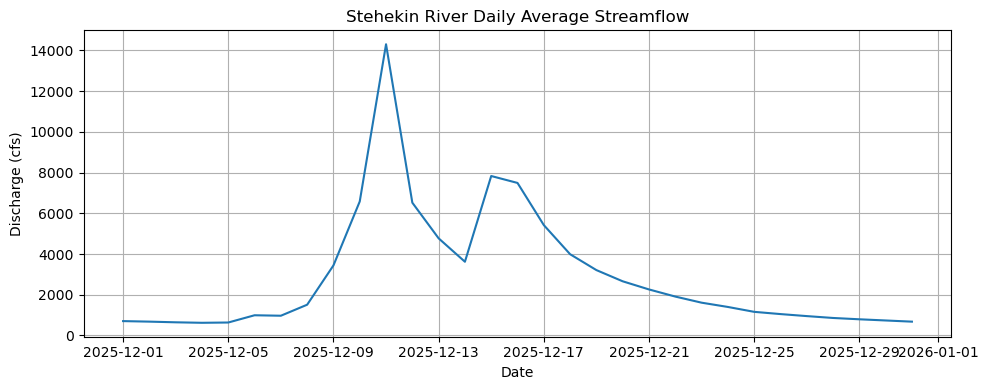

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(df["dateTime"], df["value"])
plt.xlabel("Date")
plt.ylabel("Discharge (cfs)")
plt.title("Stehekin River Daily Average Streamflow")
plt.grid(True)
plt.tight_layout()
plt.show()